In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Orders_1156515099383_20251018_194325_685.xlsx')

In [3]:
df.head()

,Order ID,Order date,Buyer first name,Buyer last name,Buyer email,Phone number,Purchaser city,Purchaser state,Purchaser country,Billing zip code,...,Eventbrite service fee,Eventbrite payment processing fee,Eventbrite tax,Organizer tax,Royalty,Ticket revenue,Add-ons revenue,Ticket + add-ons revenue,Net sales,Guest
0,4617644649,2022-09-20 13:10:27,Samuel,Uguru,samputu123@hotmail.com,NaN,Pflugerville,TX,US,NaN,...,0.00,0.0,0.00,0,0,0.00,0,0.00,0.00,No
1,4662178929,2022-09-24 21:45:46,Gemstone,Kirimi,gemstonekirimi@gmail.com,NaN,Hutto,TX,US,NaN,...,0.00,0.0,0.00,0,0,0.00,0,0.00,0.00,No
2,4796852809,2022-10-08 16:06:33,praise,c,praisec19@gmail.com,NaN,Austin,TX,US,NaN,...,1.94,0.3,0.93,0,0,9.07,0,9.07,9.07,No
3,4796877929,2022-10-08 16:09:53,Bimpe,Isafiade,bimpeisafiade@gmail.com,NaN,Dorchester,MA,US,NaN,...,1.94,0.3,0.93,0,0,9.07,0,9.07,9.07,No
4,4796929689,2022-10-08 16:17:48,Olumide,Longe,longe.olumide@yahoo.com,NaN,Oakland,CA,US,NaN,...,1.94,0.3,0.93,0,0,9.07,0,9.07,9.07,No


*EXPLORATORY DATA ANALYSIS*

In [4]:
df.columns

Index(['Order ID', 'Order date', 'Buyer first name', 'Buyer last name',
       'Buyer email', 'Phone number', 'Purchaser city', 'Purchaser state',
       'Purchaser country', 'Billing zip code', 'Billing country',
       'Event name', 'Event ID', 'Event start date', 'Event start time',
       'Event timezone', 'Event location', 'Ticket quantity',
       'Add-ons quantity', 'Currency', 'Payment status', 'Payment type',
       'Payment details', 'Gross sales', 'Eventbrite service fee',
       'Eventbrite payment processing fee', 'Eventbrite tax', 'Organizer tax',
       'Royalty', 'Ticket revenue', 'Add-ons revenue',
       'Ticket + add-ons revenue', 'Net sales', 'Guest'],
      dtype='object')

In [5]:
df.shape

(3987, 34)

In [6]:
df.duplicated().sum().sum()

np.int64(0)

In [7]:
df = df.iloc[:-1]

In [8]:
df['Order ID'].shape

(3986,)

In [9]:
df['Purchaser country'].unique()

array(['US', nan, 'IE', 'IN', 'CA', 'IL', 'FR', 'MX', 'GB', 'NG', 'NL',
       'GH', 'AU', 'DE'], dtype=object)

In [10]:
df['Event location'].unique()

array(['Presidio', '820 Shelby Ln #103', 'Factory Studio',
       'Darband Bar & Lounge', '19500 Apple Springs Dr',
       'SKYHOUSE LOUNGE', 'Smash ATX', 'Swank', 'Lit Lounge',
       'Alibi Social Bar', 'Play on West 6th', 'Bijou Lounge',
       'Busy Signal', 'Rosebar Lounge', 'Cabana Club', 'LUNA Rooftop'],
      dtype=object)

In [11]:
df['Event ID'].nunique()

36

In [12]:
df['Ticket quantity'].value_counts()

Ticket quantity
1     3478
2      426
3       50
4       26
5        3
10       1
6        1
8        1
Name: count, dtype: int64

In [13]:
df['Ticket quantity'].sum()

np.int64(4623)

In [14]:
dft = df.filter(['Order ID', 'Purchaser city', 'Purchaser state', 'Purchaser country', 'Event name', 'Event ID',
                 'Event start date', 'Event start time', 'Event location', 'Ticket quantity', 'Net sales'], axis =1)

In [15]:
dft.head()

,Order ID,Purchaser city,Purchaser state,Purchaser country,Event name,Event ID,Event start date,Event start time,Event location,Ticket quantity,Net sales
0,4617644649,Pflugerville,TX,US,Come experience an Afrobeats party in Austin l...,4.229842e+11,2022-09-24,22:00:00,Presidio,1,0.00
1,4662178929,Hutto,TX,US,Come experience an Afrobeats party in Austin l...,4.229842e+11,2022-09-24,22:00:00,Presidio,2,0.00
2,4796852809,Austin,TX,US,Afrobeats Express,4.374282e+11,2022-11-17,22:00:00,820 Shelby Ln #103,1,9.07
3,4796877929,Dorchester,MA,US,Afrobeats Express,4.374282e+11,2022-11-17,22:00:00,820 Shelby Ln #103,1,9.07
4,4796929689,Oakland,CA,US,Afrobeats Express,4.374282e+11,2022-11-17,22:00:00,820 Shelby Ln #103,1,9.07


In [16]:
#Total attendees, both free and paid


dfv = dft.groupby('Event name')['Ticket quantity'].sum().reset_index()

dfv = dfv.sort_values(by='Ticket quantity', ascending=False)

fig =px.bar(
    dfv,
    x='Event name',
    y='Ticket quantity',
    title='Total Tickets per Event',
    color='Ticket quantity'
)

fig.update_layout(
    xaxis_title='Event name',
    yaxis_title='Total Tickets',
    xaxis_tickangle=-45,
    title_x=0.5,
    width=1200,
    height=700
)

fig.show()
fig.write_image("total_tickets_per_event.png")

In [17]:
df0 = dft[dft['Net sales'] != 0]
df1 = dft[dft['Net sales'] == 0]

In [18]:
#Attendees that paid for ticket

dfv = df0.groupby('Event name')['Ticket quantity'].sum().reset_index()

dfv = dfv.sort_values(by='Ticket quantity', ascending=False)

fig =px.bar(
    dfv,
    x='Event name',
    y='Ticket quantity',
    title='Total Paid Tickets Sold per Event',
    color='Ticket quantity'
)

fig.update_layout(
    xaxis_title='Event name',
    yaxis_title='Total Tickets',
    xaxis_tickangle=-45,
    title_x=0.5,
    width=1200,
    height=700
)

fig.show()
fig.write_image("paid_tickets_per_event.png")

In [19]:
dfv = df1.groupby('Event name')['Ticket quantity'].sum().reset_index()

dfv = dfv.sort_values(by='Ticket quantity', ascending=False)

fig =px.bar(
    dfv,
    x='Event name',
    y='Ticket quantity',
    title='Total Free Ticket Given per Event',
    color='Ticket quantity'
)

fig.update_layout(
    xaxis_title='Event name',
    yaxis_title='Total Tickets',
    xaxis_tickangle=-45,
    title_x=0.5,
    width=1200,
    height=700
)

fig.show()
fig.write_image("free_tickets_per_event.png")

*ANALYZING TOTAL (PAID) TICKETS*

In [20]:
dfa = df.filter(['Order ID', 'Order date', 'Buyer first name', 'Buyer last name', 'Buyer email', 'Purchaser city',
                  'Purchaser state', 'Purchaser country', 'Event name', 'Event start date', 'Event start time',
                  'Event timezone', 'Event location', 'Ticket quantity', 'Net sales'], axis=1)

# WELCOME TO THE AFRO-EXPRESS | Official AfroTech After Party

In [21]:
df_official = dfa[dfa['Event name'] == 'WELCOME TO THE AFRO-EXPRESS | Official AfroTech After Party']

In [22]:
df_official.head()

,Order ID,Order date,Buyer first name,Buyer last name,Buyer email,Purchaser city,Purchaser state,Purchaser country,Event name,Event start date,Event start time,Event timezone,Event location,Ticket quantity,Net sales
1311,7903178519,2023-10-02 16:51:39,Chinyere,Ibezim,chinyerel.ibezim@gmail.com,Dallas,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0
1312,7903675939,2023-10-02 17:57:58,Tobi,Olagesin,tobiolagesin@gmail.com,Dallas,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0
1313,7904634609,2023-10-02 20:00:48,Gabby,Elochi,ge.onyia@gmail.com,Austin,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0
1314,7907177919,2023-10-03 02:30:21,Nan,‍,fangeez100@gmail.com,San Jose,CA,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0
1315,7907488869,2023-10-03 03:17:03,Haywood,Perry,haywood@h19ventures.com,Washington,DC,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,4,80.0


In [23]:
df_official['Purchaser country'].value_counts()

Purchaser country
US    356
CA      3
Name: count, dtype: int64

In [24]:
dfca = df_official[df_official['Purchaser country'] == 'CA']
dfca

,Order ID,Order date,Buyer first name,Buyer last name,Buyer email,Purchaser city,Purchaser state,Purchaser country,Event name,Event start date,Event start time,Event timezone,Event location,Ticket quantity,Net sales
1420,8145396219,2023-10-25 16:33:42,Daphne,Dagogo Hart,daphnedagogo@gmail.com,Calgary,AB,CA,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,25.0
1442,8158172839,2023-10-26 22:18:04,Joseph,Uyo,juyo@ualberta.ca,Calgary,AB,CA,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,25.0
1443,8158948239,2023-10-27 01:21:11,James,Aina,jydobee@gmail.com,Calgary,AB,CA,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,25.0


In [25]:
df_official['Event start date'].unique()

array(['2023-11-04'], dtype=object)

In [26]:
df_official['Purchaser state'].value_counts()

Purchaser state
TX    289
NY     10
GA      9
CA      6
FL      5
IL      4
DC      3
KY      3
VA      3
AB      3
MA      3
PA      3
NC      2
MD      2
NJ      2
WA      2
CT      1
AZ      1
NV      1
OH      1
MI      1
IN      1
CO      1
Name: count, dtype: int64

In [27]:
dfusa = df_official[df_official['Purchaser country'] == 'US']

In [28]:
dfusa['Purchaser city'].unique()

array(['Dallas', 'Austin', 'San Jose', 'Washington', 'Spring',
       'The Bronx', 'Brooklyn', 'Houston', 'Richardson', 'Berea',
       'Chicago', 'Irvine', 'Tempe', 'Los Angeles', 'Calumet City',
       'Niles', 'Grand Prairie', 'Arlington', 'Manor', 'Capitol Heights',
       'San Antonio', 'Tampa', 'Orange', 'Richmond', 'New York',
       'Las Vegas', 'Waxhaw', 'Orlando', 'Stamford', 'Altamonte Springs',
       'Leander', 'Boston', 'Longview', nan, 'Columbus', 'Jarrell',
       'Cedar Park', 'Atlanta', 'Cupertino', 'Glenolden', 'Pittsburgh',
       'Keller', 'Irving', 'Smyrna', 'Redmond', 'Urbana', 'San Francisco',
       'Dumfries', 'Seattle', 'Lincoln Park', 'Round Mountain',
       'West Lafayette', 'Pflugerville', 'Newark', 'Kyle',
       'North Richland Hills', 'Killeen', 'Fort Bragg', 'Ashburn',
       'Georgetown', 'Round Rock', 'Denver', 'Buda', 'Burleson'],
      dtype=object)

In [29]:
city_coords = {
    'Dallas': (32.7767, -96.7970),
    'Austin': (30.2672, -97.7431),
    'San Jose': (37.3382, -121.8863),
    'Washington': (38.9072, -77.0369),        
    'Spring': (30.0802, -95.4173),              
    'The Bronx': (40.8448, -73.8648),
    'Brooklyn': (40.6782, -73.9442),
    'Houston': (29.7604, -95.3698),
    'Richardson': (32.9482, -96.7299),
    'Berea': (37.5684, -84.2946),              
    'Chicago': (41.8781, -87.6298),
    'Irvine': (33.6846, -117.8265),
    'Tempe': (33.4255, -111.9400),
    'Los Angeles': (34.0522, -118.2437),
    'Calumet City': (41.6156, -87.5297),
    'Niles': (42.0256, -87.7736),
    'Grand Prairie': (32.7459, -96.9978),
    'Arlington': (32.7357, -97.1081),
    'Manor': (30.3456, -97.5670),
    'Capitol Heights': (38.8876, -76.9236),
    'San Antonio': (29.4241, -98.4936),
    'Tampa': (27.9506, -82.4572),
    'Orange': (33.7879, -117.8531),          
    'Richmond': (37.5407, -77.4360),         
    'New York': (40.7128, -74.0060),
    'Las Vegas': (36.1699, -115.1398),
    'Waxhaw': (35.0007, -80.7401),
    'Orlando': (28.5383, -81.3792),
    'Stamford': (41.0534, -73.5387),
    'Altamonte Springs': (28.6618, -81.3656),
    'Leander': (30.5425, -97.8639),
    'Boston': (42.3601, -71.0589),
    'Longview': (32.5007, -94.7405),
    'Columbus': (39.9612, -82.9988),
    'Jarrell': (30.8285, -97.6558),
    'Cedar Park': (30.5052, -97.8203),
    'Atlanta': (33.7490, -84.3880),
    'Cupertino': (37.3229, -122.0322),
    'Glenolden': (39.8982, -75.2876),
    'Pittsburgh': (40.4406, -79.9959),
    'Keller': (32.9343, -97.2293),
    'Irving': (32.8140, -96.9489),
    'Smyrna': (33.8830, -84.5144),
    'Redmond': (47.6740, -122.1215),
    'Urbana': (40.1106, -88.2073),
    'San Francisco': (37.7749, -122.4194),
    'Dumfries': (38.5668, -77.3243),
    'Seattle': (47.6062, -122.3321),
    'Lincoln Park': (42.2506, -83.1785), 
    'Round Mountain': (30.6830, -97.6836),
    'West Lafayette': (40.4259, -86.9081),
    'Pflugerville': (30.4395, -97.6200),
    'Newark': (40.7357, -74.1724),
    'Kyle': (29.9891, -97.8722),
    'North Richland Hills': (32.8343, -97.2289),
    'Killeen': (31.1171, -97.7278),
    'Fort Bragg': (35.1417, -79.0086),
    'Ashburn': (39.0438, -77.4874),
    'Georgetown': (30.6333, -97.6770),
    'Round Rock': (30.5083, -97.6789),
    'Denver': (39.7392, -104.9903),
    'Buda': (30.0902, -97.8290),
    'Burleson': (32.5421, -97.3209)
}

coords_df = pd.DataFrame([
    {'City': city, 'Latitude': latlon[0], 'Longitude': latlon[1]}
    for city, latlon in city_coords.items()
]).reset_index(drop=True)

def normalize(s):
    if pd.isna(s):
        return None
    return str(s).strip().lower()


coords_df['city_norm'] = coords_df['City'].str.strip().str.lower()
dfusa_merge = dfusa.copy()
dfusa_merge['city_norm'] = dfusa_merge['Purchaser city'].astype(str).str.strip().str.lower()

# left-join to keep all original rows
dfusa_with_coords = dfusa_merge.merge(
    coords_df[['city_norm', 'Latitude', 'Longitude']],
    on='city_norm',
    how='left'
)

dfusa = dfusa_with_coords.drop(columns=['city_norm'])

missing = dfusa_with_coords[dfusa_with_coords['Latitude'].isna()]['Purchaser city'].unique()
print("Cities still missing coordinates (unique):", missing)

Cities still missing coordinates (unique): [nan]


In [30]:
dfusa.head()

,Order ID,Order date,Buyer first name,Buyer last name,Buyer email,Purchaser city,Purchaser state,Purchaser country,Event name,Event start date,Event start time,Event timezone,Event location,Ticket quantity,Net sales,Latitude,Longitude
0,7903178519,2023-10-02 16:51:39,Chinyere,Ibezim,chinyerel.ibezim@gmail.com,Dallas,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,32.7767,-96.7970
1,7903675939,2023-10-02 17:57:58,Tobi,Olagesin,tobiolagesin@gmail.com,Dallas,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,32.7767,-96.7970
2,7904634609,2023-10-02 20:00:48,Gabby,Elochi,ge.onyia@gmail.com,Austin,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,30.2672,-97.7431
3,7907177919,2023-10-03 02:30:21,Nan,‍,fangeez100@gmail.com,San Jose,CA,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,37.3382,-121.8863
4,7907488869,2023-10-03 03:17:03,Haywood,Perry,haywood@h19ventures.com,Washington,DC,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,4,80.0,38.9072,-77.0369


In [31]:
plot_df = dfusa.dropna(subset=['Latitude','Longitude'])

fig = px.scatter_geo(
    plot_df,
    lat='Latitude',
    lon='Longitude',
    hover_name='Purchaser city',
    hover_data={
        'Order ID': True,
        'Purchaser state': True,
        'Ticket quantity': True,
        'Net sales': True,
        'Latitude': False,
        'Longitude': False
    },
    scope='north america',
    projection='natural earth',
    title='All Orders: Purchaser Locations'
)

fig.update_traces(marker=dict(size=6, opacity=0.8))
fig.update_layout(height=700)
fig.show()
fig.write_image("location_distribution.png")

In [32]:
df_official['Purchaser city'].value_counts().head(20)

Purchaser city
Austin           140
San Antonio       60
Houston           20
Dallas            18
Atlanta            7
Brooklyn           4
Cedar Park         4
The Bronx          3
New York           3
Boston             3
Grand Prairie      3
Leander            3
Irving             3
Calgary            3
Berea              3
Washington         3
Pflugerville       3
Round Rock         3
Tampa              2
Orlando            2
Name: count, dtype: int64

In [33]:
from NameGenderPredictor import predict_gender
import pandas as pd

df_official = df_official.copy()

def predict_name_gender(first_name):
    if pd.isna(first_name) or str(first_name).strip() == "":
        return "NaN"
    try:
        prob = predict_gender(str(first_name).strip())
        if prob is None:
            return "unknown"
        if prob > 0.5:
            return "male"
        elif prob < 0.5:
            return "female"
        else:
            return "unknown"
    except Exception as e:
        return "unknown"

df_official['Gender'] = df_official['Buyer first name'].apply(predict_name_gender)


print(df_official[['Buyer first name','Buyer last name','Gender']].head(20))


     Buyer first name Buyer last name   Gender
1311         Chinyere          Ibezim   female
1312             Tobi        Olagesin   female
1313            Gabby          Elochi   female
1314              Nan               ‍   female
1315          Haywood           Perry     male
1316             Lily            Kumi   female
1317            Chidi           Okeke     male
1318        Abimisola         Anibaba  unknown
1319            April            King   female
1320          Kandyce          Knight   female
1321           Alexia         Farrell   female
1322            Adjoa         Hackman   female
1323             Kene       Orazulike     male
1324             Hawa          Touray   female
1325       Fatou Jojo           Marre  unknown
1326            Chuka           Anako     male
1327            Chika           Onyia   female
1328      Eberechukwu        Ojinnaka  unknown
1329            Silas      Floyd Fair     male
1330             Kyle       Drummonds     male


In [34]:
df_official['Gender'].value_counts()

Gender
male       144
female     138
unknown     77
Name: count, dtype: int64

In [35]:
df_official.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 1311 to 1905
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           359 non-null    object 
 1   Order date         359 non-null    object 
 2   Buyer first name   359 non-null    object 
 3   Buyer last name    359 non-null    object 
 4   Buyer email        359 non-null    object 
 5   Purchaser city     339 non-null    object 
 6   Purchaser state    356 non-null    object 
 7   Purchaser country  359 non-null    object 
 8   Event name         359 non-null    object 
 9   Event start date   359 non-null    object 
 10  Event start time   359 non-null    object 
 11  Event timezone     359 non-null    object 
 12  Event location     359 non-null    object 
 13  Ticket quantity    359 non-null    int64  
 14  Net sales          359 non-null    float64
 15  Gender             359 non-null    object 
dtypes: float64(1), int64(1), ob

In [36]:
df_official['Order date'] = pd.to_datetime(df_official['Order date'])
df_official['Event start date'] = pd.to_datetime(df_official['Event start date'])
df_official['Event start time'] = pd.to_datetime(df_official['Event start time'], format='%H:%M:%S').dt.time

In [37]:
df_official['Days to event'] = (
    df_official['Event start date'].dt.normalize()
    - df_official['Order date'].dt.normalize()
).dt.days


In [38]:
df_official.head()

,Order ID,Order date,Buyer first name,Buyer last name,Buyer email,Purchaser city,Purchaser state,Purchaser country,Event name,Event start date,Event start time,Event timezone,Event location,Ticket quantity,Net sales,Gender,Days to event
1311,7903178519,2023-10-02 16:51:39,Chinyere,Ibezim,chinyerel.ibezim@gmail.com,Dallas,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,female,33
1312,7903675939,2023-10-02 17:57:58,Tobi,Olagesin,tobiolagesin@gmail.com,Dallas,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,female,33
1313,7904634609,2023-10-02 20:00:48,Gabby,Elochi,ge.onyia@gmail.com,Austin,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,female,33
1314,7907177919,2023-10-03 02:30:21,Nan,‍,fangeez100@gmail.com,San Jose,CA,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,female,32
1315,7907488869,2023-10-03 03:17:03,Haywood,Perry,haywood@h19ventures.com,Washington,DC,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,4,80.0,male,32


In [39]:
df_official['Days to event'].describe()

count    359.000000
mean       4.874652
std        8.266064
min       -1.000000
25%        0.000000
50%        0.000000
75%        7.000000
max       33.000000
Name: Days to event, dtype: float64

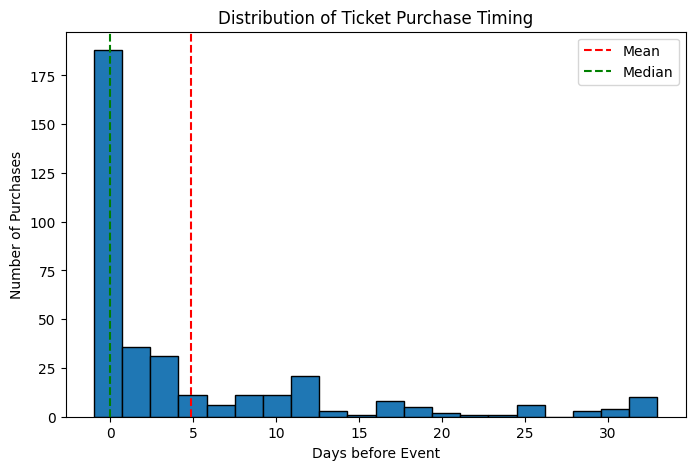

In [40]:
plt.figure(figsize=(8,5))
plt.hist(df_official['Days to event'], bins=20, edgecolor='black')
plt.axvline(df_official['Days to event'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df_official['Days to event'].median(), color='green', linestyle='--', label='Median')
plt.title('Distribution of Ticket Purchase Timing')
plt.xlabel('Days before Event')
plt.ylabel('Number of Purchases')
plt.legend()
plt.savefig("Ticket_timing .png")
plt.show()

In [41]:
df_official.head()

,Order ID,Order date,Buyer first name,Buyer last name,Buyer email,Purchaser city,Purchaser state,Purchaser country,Event name,Event start date,Event start time,Event timezone,Event location,Ticket quantity,Net sales,Gender,Days to event
1311,7903178519,2023-10-02 16:51:39,Chinyere,Ibezim,chinyerel.ibezim@gmail.com,Dallas,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,female,33
1312,7903675939,2023-10-02 17:57:58,Tobi,Olagesin,tobiolagesin@gmail.com,Dallas,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,female,33
1313,7904634609,2023-10-02 20:00:48,Gabby,Elochi,ge.onyia@gmail.com,Austin,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,female,33
1314,7907177919,2023-10-03 02:30:21,Nan,‍,fangeez100@gmail.com,San Jose,CA,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,female,32
1315,7907488869,2023-10-03 03:17:03,Haywood,Perry,haywood@h19ventures.com,Washington,DC,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,4,80.0,male,32


In [42]:
df_official['hour'] = df_official['Order date'].dt.hour

def get_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df_official['Time of day'] = df_official['hour'].apply(get_time)

In [43]:
df_official['Time of day'].value_counts()

Time of day
Evening      144
Afternoon    107
Morning       55
Night         53
Name: count, dtype: int64

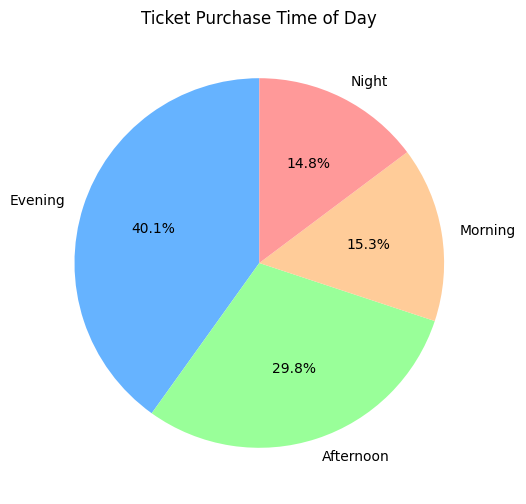

In [44]:
time_counts = df_official['Time of day'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    time_counts,
    labels=time_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']
)
plt.title('Ticket Purchase Time of Day')
plt.savefig("Ticket_day.png")
plt.show()

In [45]:
dfcheck = df_official[df_official['Days to event'] <= 13]

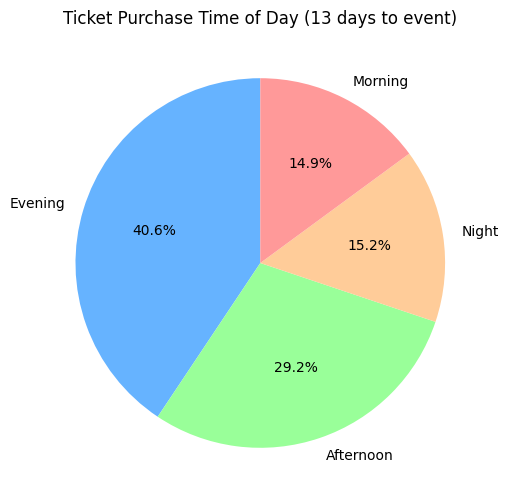

In [46]:
time_counts = dfcheck['Time of day'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    time_counts,
    labels=time_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']
)
plt.title('Ticket Purchase Time of Day (13 days to event)')
plt.show()

In [47]:
dfcheck = df_official[df_official['Days to event'] > 13]


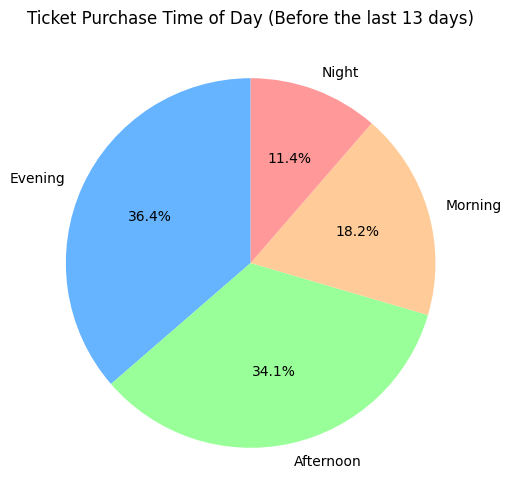

In [48]:
time_counts = dfcheck['Time of day'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    time_counts,
    labels=time_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']
)
plt.title('Ticket Purchase Time of Day (Before the last 13 days)')
plt.show()

In [49]:
df_official.isna().any()

Order ID             False
Order date           False
Buyer first name     False
Buyer last name      False
Buyer email          False
Purchaser city        True
Purchaser state       True
Purchaser country    False
Event name           False
Event start date     False
Event start time     False
Event timezone       False
Event location       False
Ticket quantity      False
Net sales            False
Gender               False
Days to event        False
hour                 False
Time of day          False
dtype: bool

In [50]:
df_official.fillna({'Purchaser city': 'Unknown', 'Purchaser state': 'Unknown'}, inplace=True)

In [51]:
df_official.columns

Index(['Order ID', 'Order date', 'Buyer first name', 'Buyer last name',
       'Buyer email', 'Purchaser city', 'Purchaser state', 'Purchaser country',
       'Event name', 'Event start date', 'Event start time', 'Event timezone',
       'Event location', 'Ticket quantity', 'Net sales', 'Gender',
       'Days to event', 'hour', 'Time of day'],
      dtype='object')

In [52]:
df_officialk = df_official.drop(['Order ID', 'Order date', 'Event location', 'Event timezone', 'Event name', 'Event start time',
                                'Buyer first name', 'Buyer last name', 'Buyer email', 'Event start date'], axis=1)

Building a Machine Learning Model For Segmentation

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le = LabelEncoder()

cols = []
for col in df_officialk.columns:
    if df_officialk[col].dtype=='object':
        cols.append(col)

In [55]:
cols

['Purchaser city',
 'Purchaser state',
 'Purchaser country',
 'Gender',
 'Time of day']

In [56]:
for col in cols:
    df_officialk[col] = le.fit_transform(df_officialk[col])
    print(le.classes_)

['Altamonte Springs' 'Arlington' 'Ashburn' 'Atlanta' 'Austin' 'Berea'
 'Boston' 'Brooklyn' 'Buda' 'Burleson' 'Calgary' 'Calumet City'
 'Capitol Heights' 'Cedar Park' 'Chicago' 'Columbus' 'Cupertino' 'Dallas'
 'Denver' 'Dumfries' 'Fort Bragg' 'Georgetown' 'Glenolden' 'Grand Prairie'
 'Houston' 'Irvine' 'Irving' 'Jarrell' 'Keller' 'Killeen' 'Kyle'
 'Las Vegas' 'Leander' 'Lincoln Park' 'Longview' 'Los Angeles' 'Manor'
 'New York' 'Newark' 'Niles' 'North Richland Hills' 'Orange' 'Orlando'
 'Pflugerville' 'Pittsburgh' 'Redmond' 'Richardson' 'Richmond'
 'Round Mountain' 'Round Rock' 'San Antonio' 'San Francisco' 'San Jose'
 'Seattle' 'Smyrna' 'Spring' 'Stamford' 'Tampa' 'Tempe' 'The Bronx'
 'Unknown' 'Urbana' 'Washington' 'Waxhaw' 'West Lafayette']
['AB' 'AZ' 'CA' 'CO' 'CT' 'DC' 'FL' 'GA' 'IL' 'IN' 'KY' 'MA' 'MD' 'MI'
 'NC' 'NJ' 'NV' 'NY' 'OH' 'PA' 'TX' 'Unknown' 'VA' 'WA']
['CA' 'US']
['female' 'male' 'unknown']
['Afternoon' 'Evening' 'Morning' 'Night']


In [57]:
from sklearn.cluster import KMeans

In [58]:
df_officialk

,Purchaser city,Purchaser state,Purchaser country,Ticket quantity,Net sales,Gender,Days to event,hour,Time of day
1311,17,20,1,1,20.0,0,33,16,0
1312,17,20,1,1,20.0,0,33,17,1
1313,4,20,1,1,20.0,0,33,20,1
1314,52,2,1,1,20.0,0,32,2,3
1315,62,5,1,4,80.0,1,32,3,3
...,...,...,...,...,...,...,...,...,...
1898,4,20,1,1,20.0,2,0,23,3
1899,4,20,1,1,40.0,0,-1,0,3
1902,50,20,1,1,40.0,0,-1,0,3
1904,50,20,1,1,40.0,0,-1,0,3


In [59]:
model = KMeans(n_clusters=3, random_state=30)
model.fit(df_officialk)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,30
,copy_x,True
,algorithm,'lloyd'


In [60]:
labels = model.labels_

In [61]:
from sklearn.decomposition import PCA

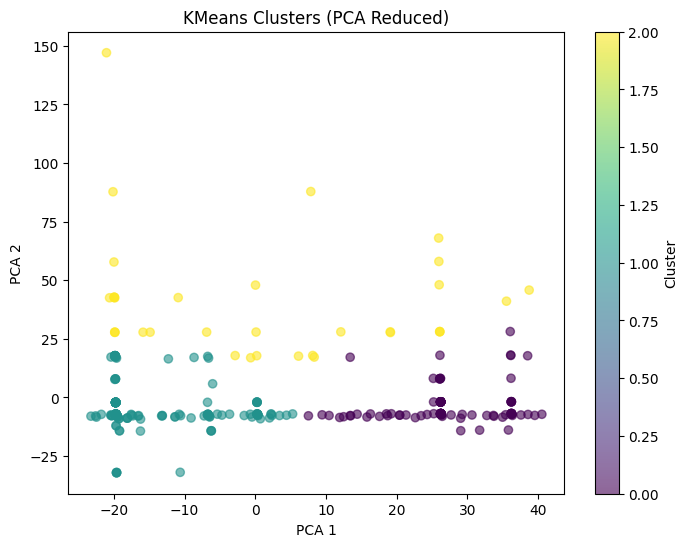

In [62]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_officialk.toarray() if hasattr(df_officialk, "toarray") else df_officialk)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", alpha=0.6)
plt.title("KMeans Clusters (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.savefig("cluster_ae.png")
plt.show()

In [63]:
centroids = model.cluster_centers_
centroids.shape, centroids

((3, 9),
 array([[50.96521739, 17.6       ,  1.        ,  1.05217391, 28.2173913 ,
          0.91304348,  4.75652174, 15.4       ,  0.97391304],
        [ 8.43062201, 18.48325359,  0.98564593,  1.1291866 , 27.94258373,
          0.77511962,  5.22009569, 15.32535885,  1.21052632],
        [24.97142857, 18.74285714,  1.        ,  2.22857143, 72.71428571,
          0.88571429,  3.2       , 16.34285714,  1.37142857]]))

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



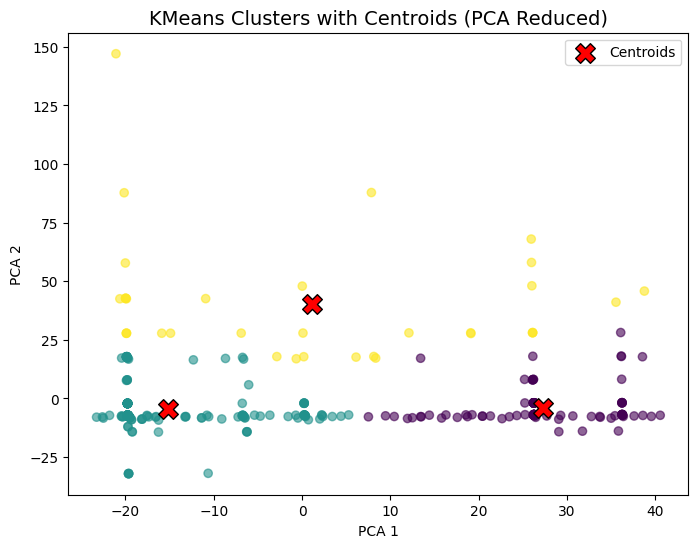

In [64]:
centroids_pca = pca.transform(model.cluster_centers_)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", alpha=0.6)

plt.scatter(centroids_pca[:,0], centroids_pca[:,1],
            c="red", marker="X", s=200, edgecolor="black", label="Centroids")

plt.title("KMeans Clusters with Centroids (PCA Reduced)", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.savefig("cluster_ae.png")
plt.show()

In [65]:
from sklearn.metrics import silhouette_score

In [66]:
ss = silhouette_score(df_officialk, model.labels_)
ss

0.5105257274919719

In [67]:
n_clusters = range(2, 13)
inertia_error = []
silhouette_scores =[]

for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=30)
    model.fit(df_officialk)

    inertia_error.append(model.inertia_)
    silhouette_scores.append(silhouette_score(df_officialk, model.labels_))

print('inertia error type:', type(inertia_error))
print('inertia error length:', len(inertia_error))
print('inertia error:', inertia_error)

print('silhouette scores type:', type(silhouette_scores))
print('silhouette scores length:', len(silhouette_scores))
print('silhouette scores:', silhouette_scores)

inertia error type: <class 'list'>
inertia error length: 11
inertia error: [171552.600235136, 117895.85322595024, 97808.0189913286, 85983.0278847399, 70245.3916661912, 63690.8042740999, 55952.058583902806, 52803.94589834272, 48888.207770235545, 42955.28747477199, 40511.05580059793]
silhouette scores type: <class 'list'>
silhouette scores length: 11
silhouette scores: [0.4914784430150992, 0.5105257274919719, 0.4851839558580665, 0.46458504919792176, 0.46319650867128215, 0.4177987579844756, 0.4308822210829139, 0.42900348174206987, 0.43454341547573455, 0.42895999511853516, 0.42977208327266864]


<function matplotlib.pyplot.show(close=None, block=None)>

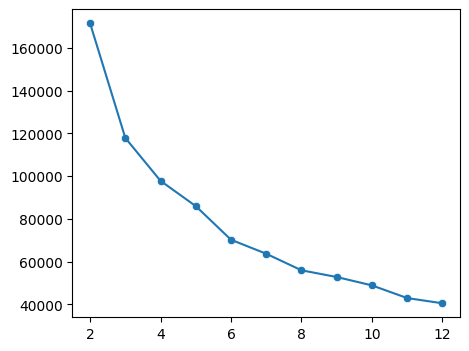

In [68]:
plt.figure(figsize=(5,4))
sns.lineplot(x=n_clusters, y=inertia_error)
sns.scatterplot(x=n_clusters, y=inertia_error)
plt.show

In [69]:
df_official['labels'] = labels

In [70]:
df_official.head()

,Order ID,Order date,Buyer first name,Buyer last name,Buyer email,Purchaser city,Purchaser state,Purchaser country,Event name,Event start date,Event start time,Event timezone,Event location,Ticket quantity,Net sales,Gender,Days to event,hour,Time of day,labels
1311,7903178519,2023-10-02 16:51:39,Chinyere,Ibezim,chinyerel.ibezim@gmail.com,Dallas,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,female,33,16,Afternoon,1
1312,7903675939,2023-10-02 17:57:58,Tobi,Olagesin,tobiolagesin@gmail.com,Dallas,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,female,33,17,Evening,1
1313,7904634609,2023-10-02 20:00:48,Gabby,Elochi,ge.onyia@gmail.com,Austin,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,female,33,20,Evening,1
1314,7907177919,2023-10-03 02:30:21,Nan,‍,fangeez100@gmail.com,San Jose,CA,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,female,32,2,Night,0
1315,7907488869,2023-10-03 03:17:03,Haywood,Perry,haywood@h19ventures.com,Washington,DC,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,4,80.0,male,32,3,Night,2


*CHECKING FOR PURCHASER CITY*

In [71]:
df0 = df_official[df_official['labels'] == 0]

df0p = df0['Purchaser city'].value_counts()
df0p.head(10)

Purchaser city
San Antonio    54
Unknown        20
Round Rock      3
New York        3
San Jose        2
Orlando         2
Washington      2
Tampa           2
The Bronx       2
Pittsburgh      2
Name: count, dtype: int64

In [72]:
df1 = df_official[df_official['labels'] == 1]

df1p = df1['Purchaser city'].value_counts()
df1p.head(10)

Purchaser city
Austin        131
Dallas         17
Houston        17
Atlanta         5
Brooklyn        4
Boston          3
Berea           3
Calgary         3
Cedar Park      3
Irving          3
Name: count, dtype: int64

In [73]:
df2 = df_official[df_official['labels'] == 2]

df2p = df2['Purchaser city'].value_counts()
df2p.head(10)

Purchaser city
Austin           9
San Antonio      6
Houston          3
Leander          3
Atlanta          2
Pflugerville     2
Grand Prairie    1
The Bronx        1
Cedar Park       1
Washington       1
Name: count, dtype: int64

*CHECKING TICKET QUANTITY*

In [74]:
df0 = df_official[df_official['labels'] == 0]

df0t = df0['Ticket quantity'].value_counts()
df0t.head(10)

Ticket quantity
1    109
2      6
Name: count, dtype: int64

In [75]:
df1 = df_official[df_official['labels'] == 1]

df1t = df1['Ticket quantity'].value_counts()
df1t.head(10)

Ticket quantity
1    184
2     24
4      1
Name: count, dtype: int64

In [76]:
df2 = df_official[df_official['labels'] == 2]

df2t = df2['Ticket quantity'].value_counts()
df2t.head(10)

Ticket quantity
2    20
3     7
1     5
4     3
Name: count, dtype: int64

*CHECKING GENDER DISTRIBUTION*

In [77]:
df0 = df_official[df_official['labels'] == 0]

df0g = df0['Gender'].value_counts()
df0g.head(10)

Gender
female     42
male       41
unknown    32
Name: count, dtype: int64

In [78]:
df1 = df_official[df_official['labels'] == 1]

df1g = df1['Gender'].value_counts()
df1g.head(10)

Gender
male       88
female     84
unknown    37
Name: count, dtype: int64

In [79]:
df2 = df_official[df_official['labels'] == 2]

df2g = df2['Gender'].value_counts()
df2g.head(10)

Gender
male       15
female     12
unknown     8
Name: count, dtype: int64

*CHECKING DAYS TO EVENT*

In [80]:
df0 = df_official[df_official['labels'] == 0]

df0d = df0['Days to event'].value_counts()
df0d.head(10)

Days to event
 0     58
 1      7
 12     6
 5      4
 4      4
 2      4
 32     3
 10     3
 3      3
-1      3
Name: count, dtype: int64

In [81]:
df1 = df_official[df_official['labels'] == 1]

df1d = df1['Days to event'].value_counts()
df1d.head(10)

Days to event
0     103
1      13
3      12
2      10
10      8
4       7
12      6
11      6
5       6
9       5
Name: count, dtype: int64

In [82]:
df2 = df_official[df_official['labels'] == 2]

df2d = df2['Days to event'].value_counts()
df2d.head(10)

Days to event
0     23
3      4
30     1
32     1
14     1
12     1
4      1
5      1
2      1
1      1
Name: count, dtype: int64

*CHECKING TIME OF DAY*

In [83]:
df0 = df_official[df_official['labels'] == 0]

df0ti = df0['Time of day'].value_counts()
df0ti.head(10)

Time of day
Evening      48
Afternoon    41
Morning      14
Night        12
Name: count, dtype: int64

In [84]:
df1 = df_official[df_official['labels'] == 1]

df1ti = df1['Time of day'].value_counts()
df1ti.head(10)

Time of day
Evening      77
Afternoon    61
Morning      37
Night        34
Name: count, dtype: int64

In [85]:
df2 = df_official[df_official['labels'] == 2]

df2ti = df2['Time of day'].value_counts()
df2ti.head(10)

Time of day
Evening      19
Night         7
Afternoon     5
Morning       4
Name: count, dtype: int64

In [86]:
df_numeric = df_official.select_dtypes(include=[np.number])

In [87]:
df_numeric

,Ticket quantity,Net sales,Days to event,hour,labels
1311,1,20.0,33,16,1
1312,1,20.0,33,17,1
1313,1,20.0,33,20,1
1314,1,20.0,32,2,0
1315,4,80.0,32,3,2
...,...,...,...,...,...
1898,1,20.0,0,23,1
1899,1,40.0,-1,0,1
1902,1,40.0,-1,0,0
1904,1,40.0,-1,0,0


In [88]:
xgb=df_numeric.groupby(df_numeric['labels']).mean()
xgb

,Ticket quantity,Net sales,Days to event,hour
labels,,,,
0,1.052174,28.217391,4.756522,15.400000
1,1.129187,27.942584,5.220096,15.325359
2,2.228571,72.714286,3.200000,16.342857


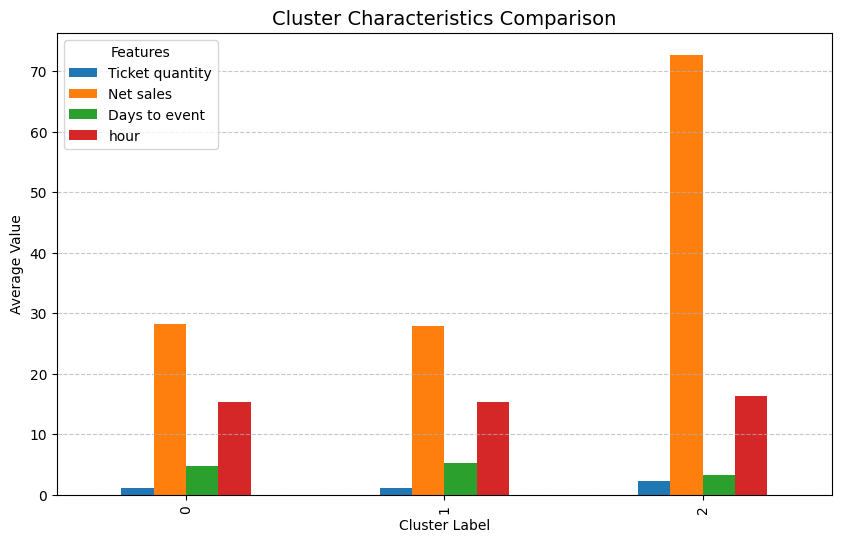

In [89]:
xgb.plot(kind='bar', figsize=(10,6))
plt.title('Cluster Characteristics Comparison', fontsize=14)
plt.xlabel('Cluster Label')
plt.ylabel('Average Value')
plt.legend(title='Features')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("cluster_cha.png")
plt.show()

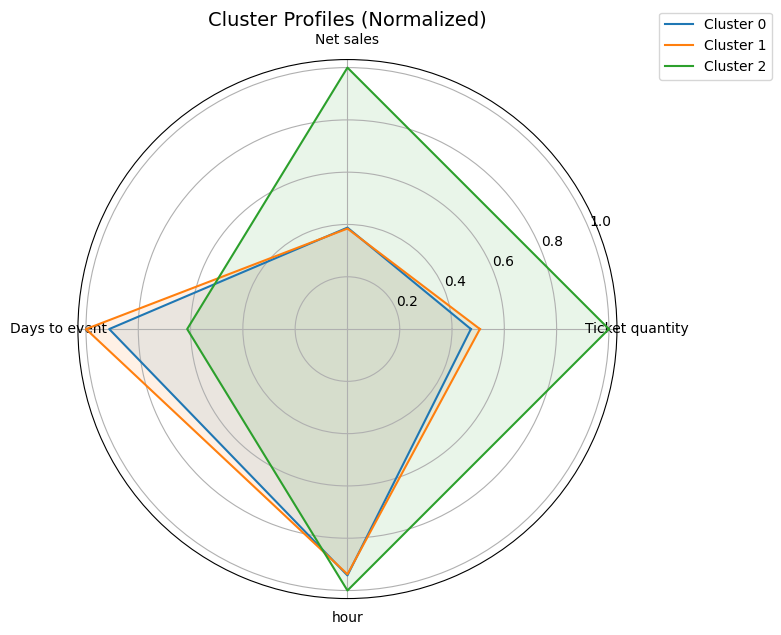

In [90]:
xgb_norm = xgb / xgb.max()

# Radar chart setup
categories = list(xgb_norm.columns)
N = len(categories)

angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

for i, row in xgb_norm.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Cluster Profiles (Normalized)', size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.savefig("cluster_char.png")
plt.show()

# AFROBEATS EXPRESS

In [91]:
df_express = dfa[dfa['Event name'] == 'Afrobeats Express']

In [92]:
df_express

,Order ID,Order date,Buyer first name,Buyer last name,Buyer email,Purchaser city,Purchaser state,Purchaser country,Event name,Event start date,Event start time,Event timezone,Event location,Ticket quantity,Net sales
2,4796852809,2022-10-08 16:06:33,praise,c,praisec19@gmail.com,Austin,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,9.07
3,4796877929,2022-10-08 16:09:53,Bimpe,Isafiade,bimpeisafiade@gmail.com,Dorchester,MA,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,9.07
4,4796929689,2022-10-08 16:17:48,Olumide,Longe,longe.olumide@yahoo.com,Oakland,CA,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,9.07
5,4797178669,2022-10-08 16:54:50,Chuka,Anako,canako1998@gmail.com,San Antonio,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,9.07
6,4797405219,2022-10-08 17:31:45,Tife,Ogungboye,boluogungboye@gmail.com,Leander,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,9.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,5198054439,2022-11-17 14:35:55,Tayo,Adedokun,tayoa1989@gmail.com,Austin,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,22.85
509,5198313569,2022-11-17 15:00:47,Toyin,Adedokun,toyinonline@me.com,Austin,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,22.85
510,5198560639,2022-11-17 15:30:20,Emeka,Avunanya,davidavunanya@yahoo.com,San Antonio,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,2,45.70
511,5198766349,2022-11-17 15:49:25,Liz,Oluokun,elizabetholuokun@ymail.com,Austin,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,22.85


In [93]:
df_express['Event start date'].unique()

array(['2022-11-17'], dtype=object)

In [94]:
df_express['Purchaser country'].value_counts()

Purchaser country
US    328
CA      2
IE      1
IN      1
IL      1
Name: count, dtype: int64

In [95]:
df_express['Purchaser state'].value_counts()

Purchaser state
TX    219
MD     13
CA     12
GA      8
IL      8
FL      8
NY      7
WA      6
MA      4
VA      4
DC      3
PA      3
CT      2
UT      2
NC      2
LA      2
NV      2
MO      2
AR      2
ON      2
NJ      2
SC      1
AZ      1
OK      1
L       1
NE      1
MN      1
OH      1
AL      1
CO      1
Name: count, dtype: int64

In [96]:
df_express['Purchaser city'].value_counts()

Purchaser city
Austin          88
San Antonio     34
Houston         18
Dallas           9
Pflugerville     8
                ..
Birmingham       1
Chester          1
Belton           1
Stockton         1
Buda             1
Name: count, Length: 95, dtype: int64

In [97]:
from NameGenderPredictor import predict_gender
import pandas as pd

df_express = df_express.copy()

def predict_name_gender(first_name):
    if pd.isna(first_name) or str(first_name).strip() == "":
        return "NaN"
    try:
        prob = predict_gender(str(first_name).strip())
        if prob is None:
            return "unknown"
        if prob > 0.5:
            return "male"
        elif prob < 0.5:
            return "female"
        else:
            return "unknown"
    except Exception as e:
        return "unknown"

df_express['Gender'] = df_express['Buyer first name'].apply(predict_name_gender)


print(df_express[['Buyer first name','Buyer last name','Gender']].head(20))


   Buyer first name Buyer last name   Gender
2            praise               c   female
3             Bimpe        Isafiade  unknown
4           Olumide           Longe     male
5             Chuka           Anako     male
6             Tife        Ogungboye  unknown
7       Maximillian         Nwaigwe     male
8     Oluwafeyisayo         Afolabi  unknown
9             Kasim       Abdullahi     male
10               JJ             Uku     male
11          ololade      mafimidiwo   female
12            Tyler          Ramsey     male
13  Oluwatimilehin        Ijabiken      male
14         Chukwudi       Onyeanula     male
15          William          Miller     male
16              Bim         Anibaba  unknown
17          Fortune            Diwe   female
18          Saritta           Hines  unknown
19            Kachi            Kalu  unknown
20              Jay            Echi     male
21            Emeka           Osuji     male


In [98]:
df_express['Gender'].value_counts()

Gender
male       135
female     120
unknown     78
Name: count, dtype: int64

In [99]:
df_express['Order date'] = pd.to_datetime(df_express['Order date'])
df_express['Event start date'] = pd.to_datetime(df_express['Event start date'])
df_express['Event start time'] = pd.to_datetime(df_express['Event start time'], format='%H:%M:%S').dt.time

In [100]:
df_express['Days to event'] = (
    df_express['Event start date'].dt.normalize()
    - df_express['Order date'].dt.normalize()
).dt.days

In [101]:
df_express['Days to event'].describe()

count    333.000000
mean      12.897898
std       12.415562
min        0.000000
25%        2.000000
50%        8.000000
75%       25.000000
max       40.000000
Name: Days to event, dtype: float64

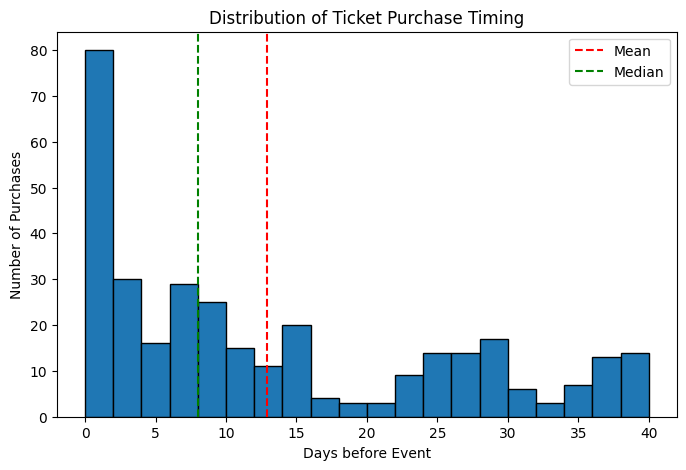

In [102]:
plt.figure(figsize=(8,5))
plt.hist(df_express['Days to event'], bins=20, edgecolor='black')
plt.axvline(df_express['Days to event'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df_express['Days to event'].median(), color='green', linestyle='--', label='Median')
plt.title('Distribution of Ticket Purchase Timing')
plt.xlabel('Days before Event')
plt.ylabel('Number of Purchases')
plt.legend()
plt.savefig("tick_time.png")
plt.show()

In [103]:
df_express['hour'] = df_express['Order date'].dt.hour

def get_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df_express['Time of day'] = df_express['hour'].apply(get_time)

In [104]:
df_express['Time of day'].value_counts()

Time of day
Evening      115
Afternoon    111
Morning       65
Night         42
Name: count, dtype: int64

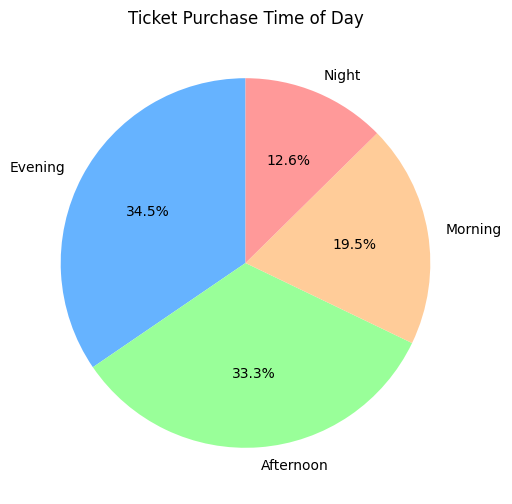

In [105]:
time_counts = df_express['Time of day'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    time_counts,
    labels=time_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']
)
plt.title('Ticket Purchase Time of Day')
plt.savefig("tick_day.png")
plt.show()

In [106]:
dfcheck = df_express[df_express['Days to event'] <= 25]

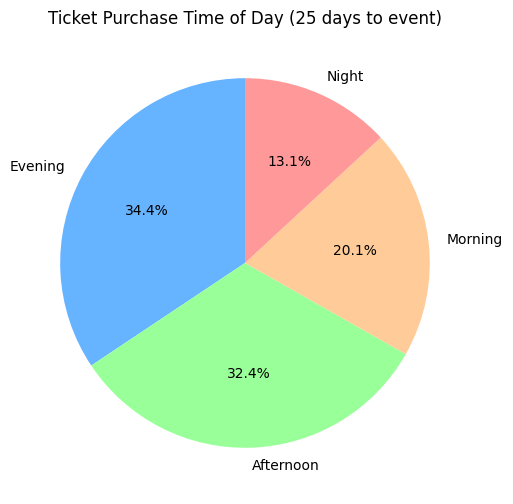

In [107]:
time_counts = dfcheck['Time of day'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    time_counts,
    labels=time_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']
)
plt.title('Ticket Purchase Time of Day (25 days to event)')
plt.show()

In [108]:
dfcheck = df_express[df_express['Days to event'] > 25]

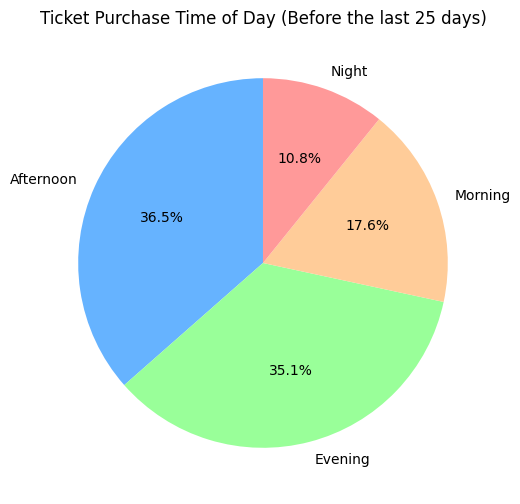

In [109]:
time_counts = dfcheck['Time of day'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    time_counts,
    labels=time_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']
)
plt.title('Ticket Purchase Time of Day (Before the last 25 days)')
plt.show()

In [110]:
df_express.isna().any()

Order ID             False
Order date           False
Buyer first name     False
Buyer last name       True
Buyer email          False
Purchaser city        True
Purchaser state       True
Purchaser country    False
Event name           False
Event start date     False
Event start time     False
Event timezone       False
Event location       False
Ticket quantity      False
Net sales            False
Gender               False
Days to event        False
hour                 False
Time of day          False
dtype: bool

In [111]:
df_express.fillna({'Buyer last name': 'Unknown', 'Purchaser city': 'Unknown', 'Purchaser state': 'Unknown'}, inplace=True)

In [112]:
df_expressk = df_express.drop(['Order ID', 'Order date', 'Event location', 'Event timezone', 'Event name', 'Event start time',
                                'Buyer first name', 'Buyer last name', 'Buyer email', 'Event start date'], axis=1)

Building a Machine Learning Model For Segmentation

In [113]:
le = LabelEncoder()

cols = []
for col in df_expressk.columns:
    if df_expressk[col].dtype=='object':
        cols.append(col)

In [114]:
for col in cols:
    df_expressk[col] = le.fit_transform(df_expressk[col])
    print(le.classes_)

['Alexandria' 'Anaheim' 'Ashburn' 'Atlanta' 'Austin' 'Baltimore' 'Belton'
 'Birmingham' 'Bowie' 'Bridgeport' 'Brockton' 'Brooklyn' 'Bryan' 'Buda'
 'Cedar Park' 'Chandler' 'Charlotte' 'Chester' 'Chicago' 'Clementon'
 'College Station' 'Columbus' 'Cypress' 'Dallas' 'Dorchester' 'Dublin'
 'Federal Way' 'Foothill Ranch' 'Fort Worth' 'Frederick' 'Fremont'
 'Germantown' 'Grand Prairie' 'Gwynn Oak' 'Houston' 'Hyattsville'
 'Irvington' 'Katy' 'Kent' 'Kingsville' 'Kirkland' 'Kissimmee' 'Las Vegas'
 'Leander' 'Lewisville' 'Little Rock' 'Manor' 'Marietta' 'Miami'
 'Milpitas' 'Milton' 'Missouri City' 'New Braunfels' 'New Orleans'
 'New York' 'North Richland Hills' 'North York' 'Oakland' 'Ogden'
 'Oklahoma City' 'Orlando' 'Pacific Palisades' 'Palm Bay' 'Pflugerville'
 'Philadelphia' 'Pittsburgh' 'Plano' 'Prosper' 'Ravenel' 'Redmond'
 'Richardson' 'Riverdale' 'Rockwall' 'Round Lake' 'Round Rock'
 'San Antonio' 'San Francisco' 'San Pablo' 'Saugus' 'Scarsdale' 'Seattle'
 'Severn' 'Shreveport' 'Silver 

In [115]:
model = KMeans(n_clusters=2, random_state=30)
model.fit(df_expressk)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,30
,copy_x,True
,algorithm,'lloyd'


In [116]:
labels = model.labels_

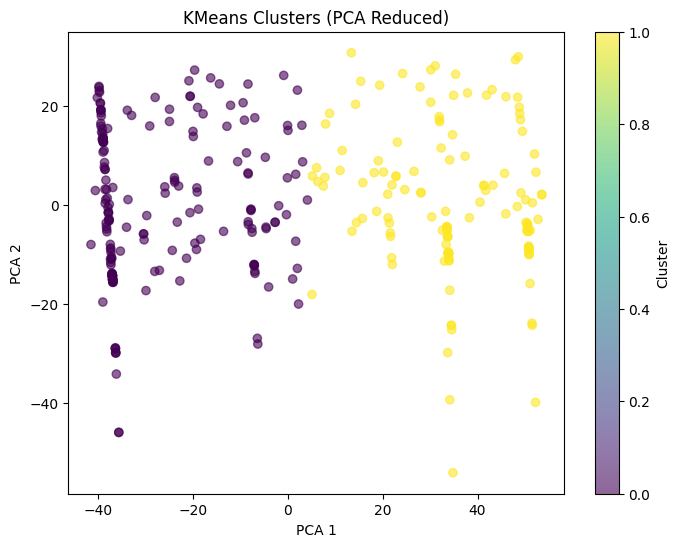

In [117]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_expressk.toarray() if hasattr(df_expressk, "toarray") else df_expressk)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", alpha=0.6)
plt.title("KMeans Clusters (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

In [118]:
centroids = model.cluster_centers_
centroids.shape, centroids

((2, 9),
 array([[15.37894737, 22.55789474,  3.98421053,  1.20526316, 18.45031579,
          0.87368421, 14.35263158, 14.7       ,  1.16315789],
        [77.        , 21.48251748,  3.92307692,  1.1958042 , 20.12895105,
          0.87412587, 10.96503497, 14.18181818,  1.04895105]]))

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



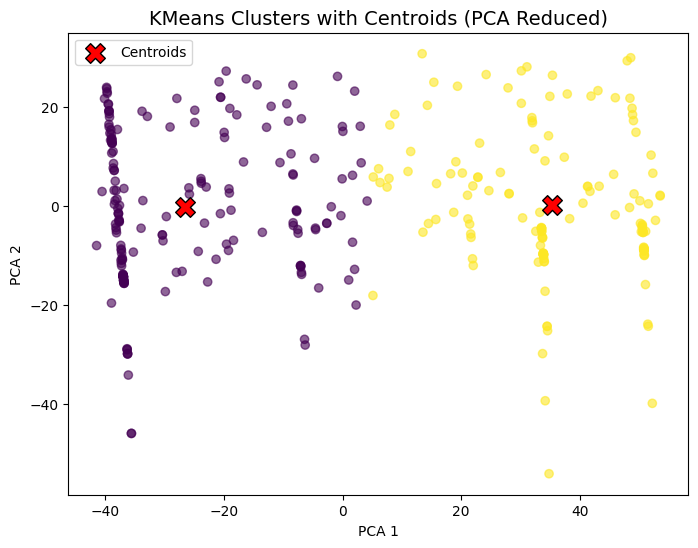

In [119]:
centroids_pca = pca.transform(model.cluster_centers_)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", alpha=0.6)

plt.scatter(centroids_pca[:,0], centroids_pca[:,1],
            c="red", marker="X", s=200, edgecolor="black", label="Centroids")

plt.title("KMeans Clusters with Centroids (PCA Reduced)", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.savefig("cluster_2.png")
plt.show()

In [120]:
ss = silhouette_score(df_expressk, model.labels_)
ss

0.5222148098965439

In [121]:
n_clusters = range(2, 13)
inertia_error = []
silhouette_scores =[]

for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=30)
    model.fit(df_expressk)

    inertia_error.append(model.inertia_)
    silhouette_scores.append(silhouette_score(df_expressk, model.labels_))

print('inertia error type:', type(inertia_error))
print('inertia error length:', len(inertia_error))
print('inertia error:', inertia_error)

print('silhouette scores type:', type(silhouette_scores))
print('silhouette scores length:', len(silhouette_scores))
print('silhouette scores:', silhouette_scores)

inertia error type: <class 'list'>
inertia error length: 11
inertia error: [185591.00378289292, 144635.54282559408, 120034.28381046267, 109488.40242401208, 96077.69168960214, 86896.41191800915, 86224.79624363969, 75507.38838632805, 65971.97630480322, 59944.52626937804, 57864.53550680452]
silhouette scores type: <class 'list'>
silhouette scores length: 11
silhouette scores: [0.5222148098965439, 0.37363434629711845, 0.35359405364579005, 0.36408395589987397, 0.29838585298711023, 0.28533095819206633, 0.32796857012360847, 0.33635186488624924, 0.3364032640129933, 0.34596423799807857, 0.34025502563623977]


<function matplotlib.pyplot.show(close=None, block=None)>

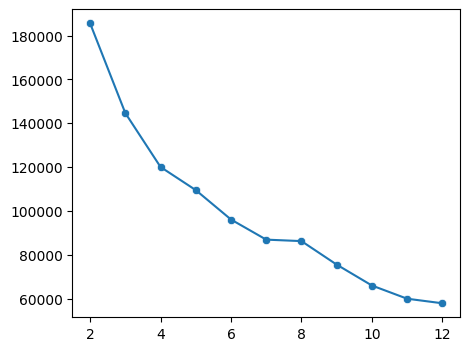

In [122]:
plt.figure(figsize=(5,4))
sns.lineplot(x=n_clusters, y=inertia_error)
sns.scatterplot(x=n_clusters, y=inertia_error)
plt.show

In [123]:
df_express['labels'] = labels

In [124]:
df_numeric = df_express.select_dtypes(include=[np.number])

In [125]:
xgb=df_numeric.groupby(df_numeric['labels']).mean()
xgb

,Ticket quantity,Net sales,Days to event,hour
labels,,,,
0,1.205263,18.450316,14.352632,14.700000
1,1.195804,20.128951,10.965035,14.181818


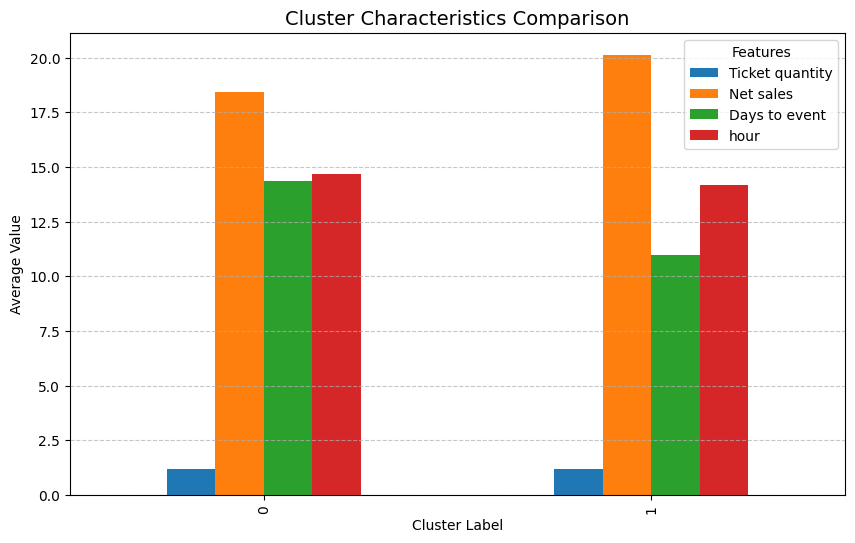

In [126]:
xgb.plot(kind='bar', figsize=(10,6))
plt.title('Cluster Characteristics Comparison', fontsize=14)
plt.xlabel('Cluster Label')
plt.ylabel('Average Value')
plt.legend(title='Features')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("clus_cha2.png")
plt.show()

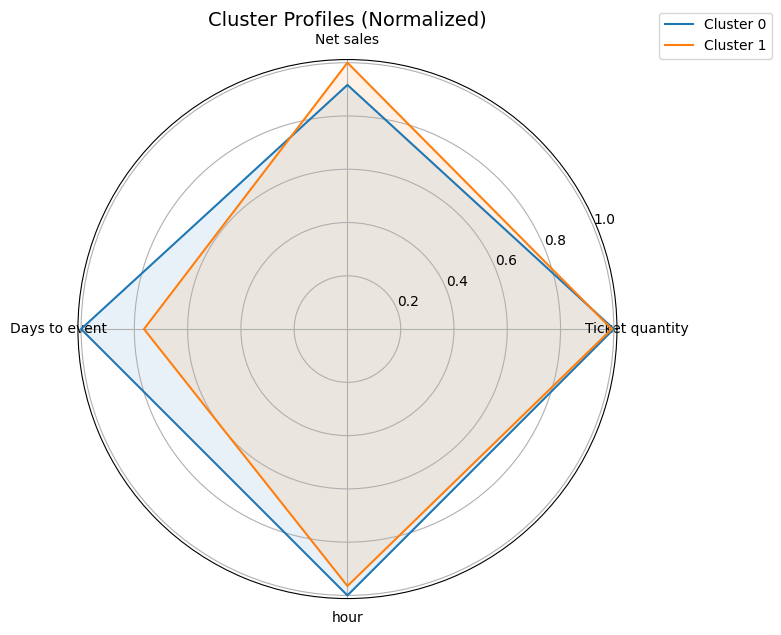

In [127]:
xgb_norm = xgb / xgb.max()

# Radar chart setup
categories = list(xgb_norm.columns)
N = len(categories)

angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

for i, row in xgb_norm.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Cluster Profiles (Normalized)', size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.savefig("clus_cha3.png")
plt.show()

# EMAIL DATA PREPARATION

In [128]:
df_express

,Order ID,Order date,Buyer first name,Buyer last name,Buyer email,Purchaser city,Purchaser state,Purchaser country,Event name,Event start date,Event start time,Event timezone,Event location,Ticket quantity,Net sales,Gender,Days to event,hour,Time of day,labels
2,4796852809,2022-10-08 16:06:33,praise,c,praisec19@gmail.com,Austin,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,9.07,female,40,16,Afternoon,0
3,4796877929,2022-10-08 16:09:53,Bimpe,Isafiade,bimpeisafiade@gmail.com,Dorchester,MA,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,9.07,unknown,40,16,Afternoon,0
4,4796929689,2022-10-08 16:17:48,Olumide,Longe,longe.olumide@yahoo.com,Oakland,CA,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,9.07,male,40,16,Afternoon,1
5,4797178669,2022-10-08 16:54:50,Chuka,Anako,canako1998@gmail.com,San Antonio,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,9.07,male,40,16,Afternoon,1
6,4797405219,2022-10-08 17:31:45,Tife,Ogungboye,boluogungboye@gmail.com,Leander,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,9.07,unknown,40,17,Evening,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,5198054439,2022-11-17 14:35:55,Tayo,Adedokun,tayoa1989@gmail.com,Austin,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,22.85,male,0,14,Afternoon,0
509,5198313569,2022-11-17 15:00:47,Toyin,Adedokun,toyinonline@me.com,Austin,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,22.85,female,0,15,Afternoon,0
510,5198560639,2022-11-17 15:30:20,Emeka,Avunanya,davidavunanya@yahoo.com,San Antonio,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,2,45.70,male,0,15,Afternoon,1
511,5198766349,2022-11-17 15:49:25,Liz,Oluokun,elizabetholuokun@ymail.com,Austin,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,22.85,female,0,15,Afternoon,0


In [129]:
df_express['labels'] = df_express['labels'].replace({0: 1, 1: 2})

In [130]:
df_express

,Order ID,Order date,Buyer first name,Buyer last name,Buyer email,Purchaser city,Purchaser state,Purchaser country,Event name,Event start date,Event start time,Event timezone,Event location,Ticket quantity,Net sales,Gender,Days to event,hour,Time of day,labels
2,4796852809,2022-10-08 16:06:33,praise,c,praisec19@gmail.com,Austin,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,9.07,female,40,16,Afternoon,1
3,4796877929,2022-10-08 16:09:53,Bimpe,Isafiade,bimpeisafiade@gmail.com,Dorchester,MA,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,9.07,unknown,40,16,Afternoon,1
4,4796929689,2022-10-08 16:17:48,Olumide,Longe,longe.olumide@yahoo.com,Oakland,CA,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,9.07,male,40,16,Afternoon,2
5,4797178669,2022-10-08 16:54:50,Chuka,Anako,canako1998@gmail.com,San Antonio,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,9.07,male,40,16,Afternoon,2
6,4797405219,2022-10-08 17:31:45,Tife,Ogungboye,boluogungboye@gmail.com,Leander,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,9.07,unknown,40,17,Evening,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,5198054439,2022-11-17 14:35:55,Tayo,Adedokun,tayoa1989@gmail.com,Austin,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,22.85,male,0,14,Afternoon,1
509,5198313569,2022-11-17 15:00:47,Toyin,Adedokun,toyinonline@me.com,Austin,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,22.85,female,0,15,Afternoon,1
510,5198560639,2022-11-17 15:30:20,Emeka,Avunanya,davidavunanya@yahoo.com,San Antonio,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,2,45.70,male,0,15,Afternoon,2
511,5198766349,2022-11-17 15:49:25,Liz,Oluokun,elizabetholuokun@ymail.com,Austin,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,22.85,female,0,15,Afternoon,1


In [131]:
df_official

,Order ID,Order date,Buyer first name,Buyer last name,Buyer email,Purchaser city,Purchaser state,Purchaser country,Event name,Event start date,Event start time,Event timezone,Event location,Ticket quantity,Net sales,Gender,Days to event,hour,Time of day,labels
1311,7903178519,2023-10-02 16:51:39,Chinyere,Ibezim,chinyerel.ibezim@gmail.com,Dallas,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,female,33,16,Afternoon,1
1312,7903675939,2023-10-02 17:57:58,Tobi,Olagesin,tobiolagesin@gmail.com,Dallas,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,female,33,17,Evening,1
1313,7904634609,2023-10-02 20:00:48,Gabby,Elochi,ge.onyia@gmail.com,Austin,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,female,33,20,Evening,1
1314,7907177919,2023-10-03 02:30:21,Nan,‍,fangeez100@gmail.com,San Jose,CA,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,female,32,2,Night,0
1315,7907488869,2023-10-03 03:17:03,Haywood,Perry,haywood@h19ventures.com,Washington,DC,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,4,80.0,male,32,3,Night,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,8238327299,2023-11-04 23:56:04,Naadja,Barnor,naadjabarnor@gmail.com,Austin,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.0,unknown,0,23,Night,1
1899,8238353519,2023-11-05 00:06:57,KATHLEEN,MEROT,katmerotstyle@gmail.com,Austin,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,40.0,female,-1,0,Night,1
1902,8238403439,2023-11-05 00:28:47,Shadie,Ellington,spgellington@gmail.com,San Antonio,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,40.0,female,-1,0,Night,0
1904,8238432129,2023-11-05 00:43:39,Grace,Ogundiran,tommyogundiran@yahoo.com,San Antonio,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,40.0,female,-1,0,Night,0


In [132]:
attendees = pd.concat([df_official, df_express], ignore_index=True)

In [133]:
attendees

,Order ID,Order date,Buyer first name,Buyer last name,Buyer email,Purchaser city,Purchaser state,Purchaser country,Event name,Event start date,Event start time,Event timezone,Event location,Ticket quantity,Net sales,Gender,Days to event,hour,Time of day,labels
0,7903178519,2023-10-02 16:51:39,Chinyere,Ibezim,chinyerel.ibezim@gmail.com,Dallas,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.00,female,33,16,Afternoon,1
1,7903675939,2023-10-02 17:57:58,Tobi,Olagesin,tobiolagesin@gmail.com,Dallas,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.00,female,33,17,Evening,1
2,7904634609,2023-10-02 20:00:48,Gabby,Elochi,ge.onyia@gmail.com,Austin,TX,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.00,female,33,20,Evening,1
3,7907177919,2023-10-03 02:30:21,Nan,‍,fangeez100@gmail.com,San Jose,CA,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,1,20.00,female,32,2,Night,0
4,7907488869,2023-10-03 03:17:03,Haywood,Perry,haywood@h19ventures.com,Washington,DC,US,WELCOME TO THE AFRO-EXPRESS | Official AfroTec...,2023-11-04,22:00:00,America/Chicago,Smash ATX,4,80.00,male,32,3,Night,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,5198054439,2022-11-17 14:35:55,Tayo,Adedokun,tayoa1989@gmail.com,Austin,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,22.85,male,0,14,Afternoon,1
688,5198313569,2022-11-17 15:00:47,Toyin,Adedokun,toyinonline@me.com,Austin,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,22.85,female,0,15,Afternoon,1
689,5198560639,2022-11-17 15:30:20,Emeka,Avunanya,davidavunanya@yahoo.com,San Antonio,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,2,45.70,male,0,15,Afternoon,2
690,5198766349,2022-11-17 15:49:25,Liz,Oluokun,elizabetholuokun@ymail.com,Austin,TX,US,Afrobeats Express,2022-11-17,22:00:00,America/Chicago,820 Shelby Ln #103,1,22.85,female,0,15,Afternoon,1


In [134]:
attendees['Buyer first name'] = attendees['Buyer first name'].replace('Nan', 'Fangeez')

In [135]:
attendees.filter(['Buyer first name', 'Buyer email', 'labels'], axis=1)

,Buyer first name,Buyer email,labels
0,Chinyere,chinyerel.ibezim@gmail.com,1
1,Tobi,tobiolagesin@gmail.com,1
2,Gabby,ge.onyia@gmail.com,1
3,Fangeez,fangeez100@gmail.com,0
4,Haywood,haywood@h19ventures.com,2
...,...,...,...
687,Tayo,tayoa1989@gmail.com,1
688,Toyin,toyinonline@me.com,1
689,Emeka,davidavunanya@yahoo.com,2
690,Liz,elizabetholuokun@ymail.com,1


In [136]:
attendees['Buyer email'].duplicated().sum().sum()

np.int64(54)

In [137]:
attendees.to_csv('email_attendees.csv', index=False)

In [138]:
attendees['labels'].unique()

array([1, 0, 2], dtype=int32)

In [143]:
dfg = df[~df['Event name'].isin(['Afrobeats Express', 'WELCOME TO THE AFRO-EXPRESS | Official AfroTech After Party'])]

In [146]:
dfg = dfg.filter(['Buyer first name', 'Buyer email'], axis=1)

In [147]:
dfg

,Buyer first name,Buyer email
0,Samuel,samputu123@hotmail.com
1,Gemstone,gemstonekirimi@gmail.com
43,Ajoke,ajoke_balogun@knights.ucf.edu
44,Oluwatooni,kqg5dcnp8d@privaterelay.appleid.com
45,Niyema,nonaghise@gmail.com
...,...,...
3981,Deirdre,hirethea@gmail.com
3982,Aidan,keysaidan@gmail.com
3983,Mahasin,hasii08@gmail.com
3984,Nkem,nkemegboga@yahoo.ca


In [148]:
dfg.to_csv('remaining_attendees.csv', index=False)